# Importing all the necessary libraries

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import os
import seaborn as sns
import pandas as pd
import random
import matplotlib.image as mpimg
from skimage.feature import hog
from sklearn.model_selection import train_test_split

from skimage.io import imshow, imread
from sklearn.metrics import precision_score, f1_score,accuracy_score,recall_score,classification_report
from sklearn.metrics import confusion_matrix as cmp
from sklearn.metrics import classification_report as cr
import warnings
warnings.filterwarnings('ignore')

In [2]:

import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



# Plotting the images of both the class

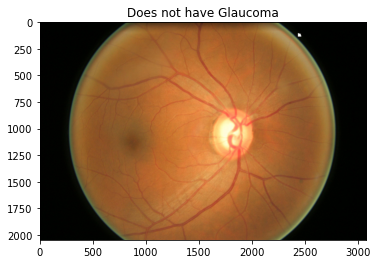

In [3]:

locc='dataset/Glaucoma_Negative/001.jpg'

img=mpimg.imread(locc)
plt.title("Does not have Glaucoma")
plt.imshow(img)

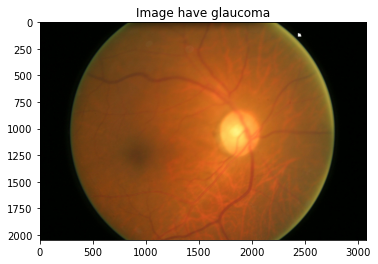

In [4]:
locc='dataset/Glaucoma_Positive/036.jpg'

img=mpimg.imread(locc)
plt.title("Image have glaucoma")
plt.imshow(img)

# dataset exploration of CSV files

In [5]:
# loading the csv dataset with pandas
data=pd.read_csv('data/glaucoma.csv')

In [6]:
# top 5 rows
data.head()

,Filename,ExpCDR,Eye,Set,Glaucoma
0,001.jpg,0.7097,OD,A,0
1,002.jpg,0.6953,OS,A,0
2,003.jpg,0.9629,OS,A,0
3,004.jpg,0.7246,OD,A,0
4,005.jpg,0.6138,OS,A,0


In [7]:
# shape information 
data.shape

(650, 5)

In [8]:
data.describe()

,ExpCDR,Glaucoma
count,650.000000,650.000000
mean,0.576308,0.258462
std,0.116395,0.438126
min,0.161000,0.000000
25%,0.496675,0.000000
50%,0.567650,0.000000
75%,0.648475,1.000000
max,0.962900,1.000000


In [9]:
df_neg = data[data.Glaucoma==0]
df_pos = data[data.Glaucoma==1]

In [10]:
df_neg.describe()

,ExpCDR,Glaucoma
count,482.000000,482.0
mean,0.542243,0.0
std,0.101580,0.0
min,0.161000,0.0
25%,0.480300,0.0
50%,0.536300,0.0
75%,0.612100,0.0
max,0.962900,0.0


In [11]:
df_pos.describe()

,ExpCDR,Glaucoma
count,168.000000,168.0
mean,0.674040,1.0
std,0.099861,0.0
min,0.364700,1.0
25%,0.607025,1.0
50%,0.667100,1.0
75%,0.743925,1.0
max,0.911800,1.0


## Target column distribution using the bar plot 

Text(0.5, 1.0, 'barplot of target')

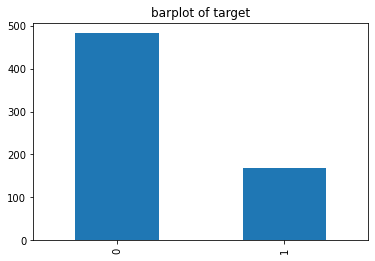

In [12]:
data['Glaucoma'].value_counts().plot(kind="bar")
plt.title('barplot of target')

# Distribution of the EYE column

Text(0.5, 1.0, 'barplot of Eye')

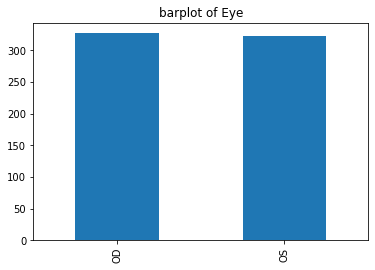

In [13]:
data['Eye'].value_counts().plot(kind="bar")
plt.title('barplot of Eye')

## distribution of set column 

Text(0.5, 1.0, 'barplot of Set')

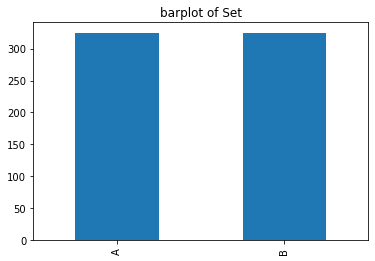

In [14]:
data['Set'].value_counts().plot(kind="bar")
plt.title('barplot of Set')

## ExpCDR column distribution

Text(0.5, 1.0, 'Distribution of ExpCDR column')

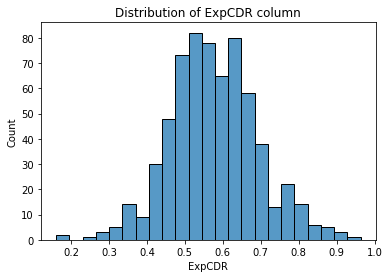

In [15]:
sns.histplot(data['ExpCDR'])
plt.title("Distribution of ExpCDR column")

# Mean pixel distribution of both the classes

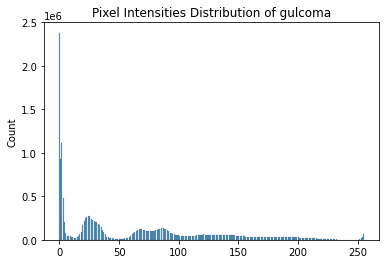

In [16]:
gulcoma=plt.imread('data/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Positive/036.jpg')

sns.histplot(gulcoma.ravel(), 
             label=f'Pixel Mean {np.mean(gulcoma):.3f} & SD {np.std(gulcoma):.3f}')

plt.title('Pixel Intensities Distribution of gulcoma')
plt.show()

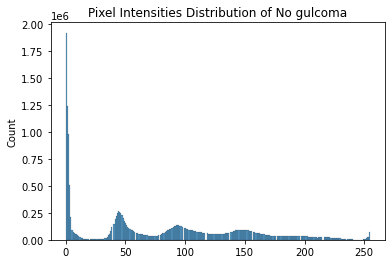

In [17]:
no_gulcoma=plt.imread('data/Fundus_Train_Val_Data/Fundus_Scanes_Sorted/Train/Glaucoma_Negative/001.jpg')

sns.histplot(no_gulcoma.ravel(), 
             label=f'Pixel Mean {np.mean(no_gulcoma):.3f} & SD {np.std(no_gulcoma):.3f}')

plt.title('Pixel Intensities Distribution of No gulcoma')
plt.show()

# Extracting the features

In [18]:
images = []
labels = [] 

SIZE = 224

for directory_path in glob.glob("dataset/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, 0) #Reading color images
        img = cv2.resize(img, (SIZE, SIZE)) #Resize images
        img = hog(img,orientations=9,pixels_per_cell=(8,8),visualize=False,cells_per_block=(3,3))
        images.append(img)
        labels.append(label)

Glaucoma_Negative
dataset\Glaucoma_Negative\001.jpg
dataset\Glaucoma_Negative\002.jpg
dataset\Glaucoma_Negative\003.jpg
dataset\Glaucoma_Negative\004.jpg
dataset\Glaucoma_Negative\005.jpg
dataset\Glaucoma_Negative\006.jpg
dataset\Glaucoma_Negative\007.jpg
dataset\Glaucoma_Negative\008.jpg
dataset\Glaucoma_Negative\009.jpg
dataset\Glaucoma_Negative\010.jpg
dataset\Glaucoma_Negative\011.jpg
dataset\Glaucoma_Negative\012.jpg
dataset\Glaucoma_Negative\013.jpg
dataset\Glaucoma_Negative\014.jpg
dataset\Glaucoma_Negative\015.jpg
dataset\Glaucoma_Negative\016.jpg
dataset\Glaucoma_Negative\017.jpg
dataset\Glaucoma_Negative\018.jpg
dataset\Glaucoma_Negative\019.jpg
dataset\Glaucoma_Negative\020.jpg
dataset\Glaucoma_Negative\021.jpg
dataset\Glaucoma_Negative\022.jpg
dataset\Glaucoma_Negative\023.jpg
dataset\Glaucoma_Negative\024.jpg
dataset\Glaucoma_Negative\025.jpg
dataset\Glaucoma_Negative\026.jpg
dataset\Glaucoma_Negative\027.jpg
dataset\Glaucoma_Negative\028.jpg
dataset\Glaucoma_Negative\029.

dataset\Glaucoma_Negative\282.jpg
dataset\Glaucoma_Negative\287.jpg
dataset\Glaucoma_Negative\288.jpg
dataset\Glaucoma_Negative\290.jpg
dataset\Glaucoma_Negative\291.jpg
dataset\Glaucoma_Negative\292.jpg
dataset\Glaucoma_Negative\295.jpg
dataset\Glaucoma_Negative\296.jpg
dataset\Glaucoma_Negative\297.jpg
dataset\Glaucoma_Negative\298.jpg
dataset\Glaucoma_Negative\299.jpg
dataset\Glaucoma_Negative\302.jpg
dataset\Glaucoma_Negative\303.jpg
dataset\Glaucoma_Negative\307.jpg
dataset\Glaucoma_Negative\308.jpg
dataset\Glaucoma_Negative\309.jpg
dataset\Glaucoma_Negative\310.jpg
dataset\Glaucoma_Negative\311.jpg
dataset\Glaucoma_Negative\313.jpg
dataset\Glaucoma_Negative\314.jpg
dataset\Glaucoma_Negative\315.jpg
dataset\Glaucoma_Negative\316.jpg
dataset\Glaucoma_Negative\318.jpg
dataset\Glaucoma_Negative\319.jpg
dataset\Glaucoma_Negative\320.jpg
dataset\Glaucoma_Negative\321.jpg
dataset\Glaucoma_Negative\323.jpg
dataset\Glaucoma_Negative\324.jpg
dataset\Glaucoma_Negative\325.jpg
dataset\Glauco

dataset\Glaucoma_Positive\050.jpg
dataset\Glaucoma_Positive\069.jpg
dataset\Glaucoma_Positive\072.jpg
dataset\Glaucoma_Positive\076.jpg
dataset\Glaucoma_Positive\086.jpg
dataset\Glaucoma_Positive\087.jpg
dataset\Glaucoma_Positive\093.jpg
dataset\Glaucoma_Positive\094.jpg
dataset\Glaucoma_Positive\097.jpg
dataset\Glaucoma_Positive\110.jpg
dataset\Glaucoma_Positive\116.jpg
dataset\Glaucoma_Positive\138.jpg
dataset\Glaucoma_Positive\158.jpg
dataset\Glaucoma_Positive\159.jpg
dataset\Glaucoma_Positive\160.jpg
dataset\Glaucoma_Positive\165.jpg
dataset\Glaucoma_Positive\168.jpg
dataset\Glaucoma_Positive\171.jpg
dataset\Glaucoma_Positive\180.jpg
dataset\Glaucoma_Positive\181.jpg
dataset\Glaucoma_Positive\182.jpg
dataset\Glaucoma_Positive\208.jpg
dataset\Glaucoma_Positive\213.jpg
dataset\Glaucoma_Positive\225.jpg
dataset\Glaucoma_Positive\228.jpg
dataset\Glaucoma_Positive\229.jpg
dataset\Glaucoma_Positive\233.jpg
dataset\Glaucoma_Positive\240.jpg
dataset\Glaucoma_Positive\241.jpg
dataset\Glauco

In [19]:
train_data = np.float32(images)
train_labels = np.array(labels)


print('Data Prepared........')
print('Train Data:',len(train_data))
print('Train Labels',len(train_labels))

Data Prepared........
Train Data: 650
Train Labels 650


In [20]:
x_train, x_test, y_train, y_test = train_test_split(train_data,train_labels,test_size=0.3,random_state=42,stratify=train_labels)

In [21]:
from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights

array([0.67507418, 1.9279661 ])

# Support vector machine

In [22]:
from sklearn.svm import LinearSVC,SVC

model = SVC()
model.fit(x_train,y_train)

SVC()

In [23]:
test_prediction = model.predict(x_test)

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print ("Accuracy = ", accuracy_score(y_test, test_prediction))


Accuracy =  0.7435897435897436


In [24]:
cm = confusion_matrix(y_test, test_prediction)
cm

array([[145,   0],
       [ 50,   0]], dtype=int64)

In [25]:
print(cr(y_test, test_prediction))

                   precision    recall  f1-score   support

Glaucoma_Negative       0.74      1.00      0.85       145
Glaucoma_Positive       0.00      0.00      0.00        50

         accuracy                           0.74       195
        macro avg       0.37      0.50      0.43       195
     weighted avg       0.55      0.74      0.63       195



## Hyperparamter tunning 

In [30]:
from sklearn.model_selection import GridSearchCV

grid = {'C': [0.9, 1]}

best_svc = GridSearchCV(estimator=model, param_grid=grid, cv= 3,n_jobs=-1)
best_svc.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1, param_grid={'C': [0.9, 1]})

In [31]:
best_svc.best_params_

{'C': 0.9}

In [32]:
svm=SVC(**best_svc.best_params_,class_weight={"Glaucoma_Negative":0.67507418,"Glaucoma_Positive":1.9279661 })
svm.fit(x_train,y_train)

SVC(C=0.9,
    class_weight={'Glaucoma_Negative': 0.67507418,
                  'Glaucoma_Positive': 1.9279661})

In [33]:
pred=svm.predict(x_test)
print(classification_report(y_test, pred))

                   precision    recall  f1-score   support

Glaucoma_Negative       0.79      0.78      0.78       145
Glaucoma_Positive       0.38      0.40      0.39        50

         accuracy                           0.68       195
        macro avg       0.59      0.59      0.59       195
     weighted avg       0.69      0.68      0.68       195



# Random forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier(class_weight={"Glaucoma_Negative":0.67507418,"Glaucoma_Positive":1.9279661 })
random_forest.fit(x_train, y_train)

RandomForestClassifier(class_weight={'Glaucoma_Negative': 0.67507418,
                                     'Glaucoma_Positive': 1.9279661})

In [35]:
preds = random_forest.predict(x_test)
print ("Accuracy = ", accuracy_score(y_test, test_prediction))


Accuracy =  0.7435897435897436


In [36]:
cm = confusion_matrix(y_test, preds)
cm

array([[145,   0],
       [ 50,   0]], dtype=int64)

In [37]:
print(cr(y_test, preds))

                   precision    recall  f1-score   support

Glaucoma_Negative       0.74      1.00      0.85       145
Glaucoma_Positive       0.00      0.00      0.00        50

         accuracy                           0.74       195
        macro avg       0.37      0.50      0.43       195
     weighted avg       0.55      0.74      0.63       195



## hyperparameter tunning 

In [38]:
param_grid = [
    {'n_estimators': [50,100,110,120,130,150],
     'max_features': [5, 10], 
     'max_depth': [10, 50, None],
     'bootstrap': [True, False]
    }
]


best_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv= 3,n_jobs=-1)
best_rf.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=RandomForestClassifier(class_weight={'Glaucoma_Negative': 0.67507418,
                                                            'Glaucoma_Positive': 1.9279661}),
             n_jobs=-1,
             param_grid=[{'bootstrap': [True, False],
                          'max_depth': [10, 50, None], 'max_features': [5, 10],
                          'n_estimators': [50, 100, 110, 120, 130, 150]}])

In [39]:
best_rf.best_params_

{'bootstrap': False, 'max_depth': 10, 'max_features': 5, 'n_estimators': 50}

In [40]:
rf=RandomForestClassifier(**best_rf.best_params_,class_weight={"Glaucoma_Negative":0.67507418,"Glaucoma_Positive":1.9279661 })
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False,
                       class_weight={'Glaucoma_Negative': 0.67507418,
                                     'Glaucoma_Positive': 1.9279661},
                       max_depth=10, max_features=5, n_estimators=50)

In [41]:
pred=rf.predict(x_test)
print(classification_report(y_test, pred))

                   precision    recall  f1-score   support

Glaucoma_Negative       0.74      1.00      0.85       145
Glaucoma_Positive       0.00      0.00      0.00        50

         accuracy                           0.74       195
        macro avg       0.37      0.50      0.43       195
     weighted avg       0.55      0.74      0.63       195



# Logistic regression

In [42]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight={"Glaucoma_Negative":0.67507418,"Glaucoma_Positive":1.9279661 })
model.fit(x_train, y_train)

LogisticRegression(class_weight={'Glaucoma_Negative': 0.67507418,
                                 'Glaucoma_Positive': 1.9279661})

In [43]:
pred=model.predict(x_test)
print("Accuracy for logistic regression is : ",accuracy_score(y_test,pred))

Accuracy for logistic regression is :  0.7333333333333333


In [44]:
print(cr(y_test, pred))

                   precision    recall  f1-score   support

Glaucoma_Negative       0.79      0.88      0.83       145
Glaucoma_Positive       0.47      0.30      0.37        50

         accuracy                           0.73       195
        macro avg       0.63      0.59      0.60       195
     weighted avg       0.70      0.73      0.71       195



## hyperparameter tunning 

In [49]:
params = {'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear'],
          'penalty' : ['l1', 'l2', 'elasticnet'],
          'C':[1,2,3]
         }


best_lr = GridSearchCV(estimator=model, param_grid=params, cv= 3,n_jobs=-1)
best_lr.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(class_weight={'Glaucoma_Negative': 0.67507418,
                                                        'Glaucoma_Positive': 1.9279661}),
             n_jobs=-1,
             param_grid={'C': [1, 2, 3], 'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'saga', 'liblinear']})

In [50]:
best_lr.best_params_

{'C': 2, 'penalty': 'l2', 'solver': 'newton-cg'}

In [51]:
lr=LogisticRegression(**best_lr.best_params_,class_weight={"Glaucoma_Negative":0.67507418,"Glaucoma_Positive":1.9279661 })
lr.fit(x_train,y_train)

LogisticRegression(C=2,
                   class_weight={'Glaucoma_Negative': 0.67507418,
                                 'Glaucoma_Positive': 1.9279661},
                   solver='newton-cg')

In [52]:
pred=lr.predict(x_test)
print(classification_report(y_test, pred))

                   precision    recall  f1-score   support

Glaucoma_Negative       0.79      0.88      0.83       145
Glaucoma_Positive       0.47      0.30      0.37        50

         accuracy                           0.73       195
        macro avg       0.63      0.59      0.60       195
     weighted avg       0.70      0.73      0.71       195



In [54]:
import pickle
pickle.dump(lr,open('lr.p','wb'))
print("Pickle is dumped successfully")

Pickle is dumped successfully
